In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-flu/covid_flu.csv


# 1 Introduction to <mark>feature engineering</mark>

<p><strong>This chapter covers:</strong></p>
<ul>
  <li><strong>Understanding</strong> the feature engineering and machine learning pipeline</li>
  <li><strong>Examining</strong> why feature engineering is important to the machine learning process</li>
  <li><strong>Taking a look</strong> at the types of feature engineering</li>
  <li><strong>Understanding</strong> how this book is structured and the types of case studies we will focus on</li>
</ul>
<p>Many prominent AI figures are urging data scientists to place more focus on a <em>data-centric view of ML</em> that focuses less on the model selection and hyperparameter-tuning process and more on <em>techniques that enhance the data</em> being ingested and used to train our models. Andrew Ng is on record saying that “<em>machine learning is basically feature engineering</em>” and that we need to be moving more toward a data-centric approach. Adopting a data-centric approach is especially useful when the following are true:</p>
<ul>
  <li><strong>Datasets have few observations (<10 K)</strong>, so we can extract as much information as possible from fewer rows.</li>
  <li><strong>Datasets have a large number of columns compared to the number of observations</strong>. This can lead to what is known as the <em>curse of dimensionality</em>, which describes an extremely sparse universe of data that ML models have difficulty learning from.</li>
</ul>

## What is feature engineering, and why does it matter?

<ul>
<li><span style="color:yellow">The term <strong>feature engineering</strong> conjures different images for different data scientists. For some data scientists, feature engineering is how we narrow down the features needed for supervised models (e.g., trying to predict a response or outcome variable).</span></li>
<li><span style="color:yellow"> For others, it is the methodology used to extract numerical representations from unstructured data for an unsupervised model (e.g., trying to extract structure from a previously unstructured dataset). Feature engineering is both of these and much more.</span></li>
<li><span style="color:yellow">For the purposes of this book, <strong>feature engineering</strong> is the art of manipulating and transforming data into a format that optimally represents the underlying problem that an ML algorithm is trying to model and mitigates inherent complexities and biases within the data.</span></li>
<li>Data practitioners often rely on ML and deep learning algorithms to extract and learn patterns from data even when the data they are using are poorly formatted and non-optimal. Reasons for this range from the practitioner trusting their ML models too much to simply not knowing the best practices for dealing with messy and inconsistent data and hoping that the ML model will just “figure it out” for them. This approach never even gives the ML models a chance to learn from proper data and dooms the data scientist from the start.</li>
<li>It comes down to whether the data scientist is willing or able to use their data as much as possible by engineering the best possible features for their ML task. If we do not engineer proper features and rely on complex and slow ML models to figure it out for us, we will likely be left with poor ML models. If we instead take the time to understand our data and craft features for our ML models to learn from, we can end up with a smaller, faster models with on-par, or even superior, performance.</li>
</ul>


## Who needs feature engineering?

* We believe that data preparation and feature engineering is a real, vital, and almost always unavoidable part of a data scientist’s work and should be treated with as much respect as the portions of the pipeline that are focused on data modeling.

## What feature engineering cannot do
* It is important to mention that <span style="color:yellow">good feature engineering</span> is not a silver bullet. Feature engineering cannot,
* for example, solve the problem of <span style="color:yellow">too little data</span> for our ML models. While there is no magic threshold for how small is too small, in most cases, when working with datasets of under 1,000 rows, feature engineering can only do so much to squeeze as much information out of those observations as possible. Of course, there are exceptions to this.
* When we touch on <span style="color:yellow">transfer learning</span> in our NLP and image case studies, we will see how pretrained ML models can learn from mere hundreds of observations, but this is only because they’ve been pretrained on hundreds of thousands of observations already.
* Feature engineering also cannot create <span style="color:yellow">links between features and responses</span> where there are not any.
* If the features we start with implicitly do not hold any <span style="color:yellow">predictive power to our response variable</span>, then no amount of feature engineering will create that link.
* We could be able to achieve small bumps in performance, but we cannot expect either feature engineering or ML models to magically create relationships between features and responses for us.

## Great data, great models

* <span style="color:yellow"> Great models cannot exist without great data. It is virtually impossible to guarantee an accurate and fair model without well-structured data that deeply represents the problem at hand</span>.

* I’ve spent the majority of my ML career working with natural language processing (NLP); specifically, I focus on building ML pipelines that can automatically derive and optimize conversational AI architecture from unstructured historical transcripts and knowledge bases. Early on, 

* I spent most of my days focusing on deriving and implementing knowledge graphs and using state-of-the-art transfer learning and sequence-to-sequence models to develop conversational AI pipelines that could learn from raw human-to-human transcripts and be able to update on new topics as new conversations came in.

* <span style="color:yellow"> Without understanding and respecting the data, I could have never brought out the greatness of the models trying their best to capture, learn from, and scale up the patterns locked within the data</span>.

## The five types of feature engineering

The main focus of this book is on five main categories of feature engineering. We will touch on each of these five categories in the next chapter, and we will continually refer back to them throughout the entire book:

<h1 style="background-color:DodgerBlue;">Feature improvement: </h1> 
 <span style="color:yellow"> - Making existing features more usable through mathematical transformations<br>
- Example: Imputing (filling in) missing temperatures on a weather dataset by inferring them from the other columns</span>

<h1 style="background-color:DodgerBlue;">Feature construction,</h1> 

<span style="color:yellow"> 
    - Augmenting the dataset by creating new interpretable features from existing interpretable features<br>
    - Example: Dividing the total price of home feature by the square foot of home feature to create a price per square foot feature in a home-valuation dataset</span>

<h1 style="background-color:DodgerBlue;">Feature selection</h1> <span style="color:yellow">— Choosing the best subset of features from an existing set of features<br>Example: After creating the price per square foot feature, possibly removing the previous two features if they don’t add any value to the ML model anymore</span>

<h1 style="background-color:DodgerBlue;">Feature extraction</h1> <span style="color:yellow">— Relying on algorithms to automatically create new, sometimes uninterpretable, features, usually based on making parametric assumptions about the data<br> - Example: Relying on pretrained transfer learning models, like Google’s BERT, to map unstructured text to a structured and generally uninterpretable vector space</span>

<h1 style="background-color:DodgerBlue;">Feature learning</h1> <span style="color:yellow">— Automatically generating a brand new set of features, usually by extracting structure and learning representations from raw unstructured data, such as text, images, and videos, often using deep learning<br>- Example: Training generative adversarial networks (GANs) to deconstruct and reconstruct images for the purposes of learning the optimal representation for a given task</span>

# 2 The basics of feature engineering

This chapter covers

* Understanding the differences between <u>structured</u> and unstructured data
* Discovering the four levels of data and how they describe the data’s properties
* Looking at the five types of feature engineering and when we want to apply each one
* Differentiating between the ways to evaluate feature engineering pipelines

First, we will look at the two broad types of datasets: structured and unstructured. Then, we will zoom in on individual features and begin to assign each feature to one of four levels of data, which tells us a great deal about what we can or cannot do with the data while engineering features.

* <span style="color:yellow"> If someone is asking for analysis on a dataset, an appropriate question in response would be, are the data structured or unstructured?</span>

 ## Structured data

*  <span style="color:yellow"> Structured data, or organized data, are data that fit a rigid data model or design.</span>
*  <span style="color:yellow"> They are usually represented in a tabular (row/column) format, in which rows represent individual observations, and columns represent the characteristics or features</span>.

Examples of structured data include the following:

*  <span style="color:yellow">Relational databases and tables of data (e.g., SQL), in which each column has a specific data type and rules for what kind of value can exist</span>

*  <span style="color:yellow">An Excel ,CSV document of data, in which each row is separate, and each column has a label that generally describes the kind of data in that column</span>

## Unstructured data

*  <span style="color:yellow">Unstructured data, on the other hand, have no predefined design and follow no particular data model.</span> 
*  <span style="color:yellow">If the dataset you are working with doesn’t really fit into a neat row-and-column structure, you are working with unstructured data.</span>

Examples of unstructured data include the following:

* <span style="color:yellow"> Transcripts of customer service conversations</span>
*  <span style="color:yellow">Videos from YouTube</span>
*  <span style="color:yellow">Audio from a podcast</span>

<table>
  <thead>
    <tr>
      <th>Examples</th>
      <th>Structured portion</th>
      <th>Unstructured portion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Phone calls</td>
      <td>Who called, who picked up, and what time the person called</td>
      <td>The audio of the call</td>
    </tr>
    <tr>
      <td>Insurance forms</td>
      <td>The date filed, who filed it, who wrote it, and what kind of claim it is</td>
      <td>The content of the open-ended questions</td>
    </tr>
    <tr>
      <td>Podcasts</td>
      <td>The date the podcast was released, the name of the host, and the category of the podcast</td>
      <td>The audio of the podcast and the written transcript</td>
    </tr>
    <tr>
      <td>Server logs</td>
      <td>The datestamp of the log, the microservice it came from, and the level of the log (e.g., info, debug, etc.)</td>
      <td>The content of the log</td>
    </tr>
  </tbody>
</table>


 <span style="color:yellow">Structured data, while comprising only about 20% of enterprise data, are generally easier to work with and cheaper to store, whereas unstructured data take up a much larger portion of enterprise data and are more difficult to work with. This book deals with both structured and unstructured data.</span>

<table>
  <thead>
    <tr>
      <th></th>
      <th>Structured data</th>
      <th>Unstructured data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Representation</td>
      <td>Can be represented in rows and columns and in a relational database.</td>
      <td>Cannot be represented as tabular data. Generally thought of as a mass of data.</td>
    </tr>
    <tr>
      <td>Usability for machine learning</td>
      <td>Generally easier to use as input data for machine learning.</td>
      <td>Harder to use as input data, as they need to be structured first.</td>
    </tr>
    <tr>
      <td>Storage capacity</td>
      <td>Require less storage capacity.</td>
      <td>Require more storage capacity.</td>
    </tr>
    <tr>
      <td>Enterprise data</td>
      <td>Estimated 20% of data in the enterprise.</td>
      <td>Estimated 80% of data in the enterprise.</td>
    </tr>
    <tr>
      <td>Examples</td>
      <td>Include spreadsheets and CSV files.</td>
      <td>Include text, video, and images.</td>
    </tr>
  </tbody>
</table>

<style>
  td, th {
    padding: 10px;
    text-align: center;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  tr:hover {
    background-color: #ffff99;
  }
</style>


## Qualitative data vs. quantitative data

* Broadly speaking,  <span style="color:yellow">a feature can be either quantitative (i.e., numerical in nature) or qualitative (i.e., categorical in nature)</span>. 
* For example,  <span style="color:yellow">quantitative data can be anything from age, temperature, and price to white-blood-cell counts and GDP. Qualitative data are pretty much anything else that isn’t numerical, like emails, tweets, blood types, and server logs.</span>

Quantitative and qualitative data can be broken down further into four sublevels of data, and knowing on which level data live will give us insight into what operations are and are not allowed to be performed on them:

* The nominal level

* The ordinal level

* The interval level

* The ratio level

Data can exist on exactly one of these four levels, and knowing which level we are working with for each of our features will often dictate what kinds of operations are and aren’t allowed to be used on them. Let’s start by taking a look at our first level: the nominal level of data.

## The nominal level

This includes categories, labels, descriptions, and classifications of things that involve no quantitative meaning whatsoever and have no discernable order.

Examples of data at the nominal level include the following:

* <span style="color:yellow">Blood types (e.g., A, AB, O, etc.)</span>
* <span style="color:yellow">State of residence when filling out shipping information</span>
* <span style="color:yellow">Phone brand owned (e.g., iPhone, Samsung, etc.)</span>



*  <span style="color:yellow">There aren’t many mathematical operations we can perform on data at the nominal level.</span> 
*  <span style="color:yellow">We cannot take the “average” of blood types, nor can we find the median state of residence.</span>
*  <span style="color:yellow">We can, however, find the mode, or most frequent value, of nominal data.</span> 
*  <span style="color:yellow">We can also visualize data at this level, using bar charts to get a count of the values of data at the nominal level.</span>

DEALING WITH DATA AT THE NOMINAL LEVEL

Simply put, 
- we either need to transform data at the nominal level to be something that a machine can interpret, or we need to get rid of it. 
- The most common way to transform nominal data is to dummify it—that is, create a brand-new binary feature (0 or 1) for each of the represented categories, and remove the original nominal feature

## The ordinal level

ordinal data depict qualitative data with some sense of order but stop short of having meaningful differences between values. One of the most common examples of data on the ordinal level is customer support satisfaction surveys. Your answer would live in the ordinal scale if I were to ask you, “How satisfied are you with this book so far?” with your choices being

* Very unhappy
* Unhappy
* Neutral
* Happy
* Very happy

It is still qualitative and still a category, but we have a sense of order. We have a scale of choices ranging from very unhappy (which I hope you aren’t; I mean you’ve made it this far in the book) to very happy (I’ll be honest, I hope you’re here, but I’ll settle for neutral or happy for now, until we get to the case studies).

## The interval level

Data at the interval level are similar to data at the ordinal level, except for the crucial fact that differences between values have a consistent meaning. This is our first level of quantitative data:

*  <span style="color:yellow">The quintessential example of data at the interval level is temperature.</span> 
*  <span style="color:yellow">We clearly have a sense of order—68 degrees is hotter than 58 degrees. We also have the luxury of knowing that if we subtract one value from another, that difference has meaning: 68-58 degrees is a difference of 10 degrees.</span> 
* Likewise, if we subtracted 37 from 47 degrees, we also get a difference of 10 degrees.

## The ratio level

Our highest level of data is the ratio level. This is the scale of data most people think of when they think of qualitative data. Data at the ratio level are, as you’ve probably already guessed, identical to data at the interval level with a true zero existing.

*  <span style="color:yellow">Age, height, and weight—These would also count as being on the ratio level.</span>

## A summary of the levels of data

<table>
  <tr>
    <th>Type of mean</th>
    <th>Description</th>
    <th>Level of data</th>
    <th>When to use</th>
    <th>When not to use</th>
  </tr>
  <tr>
    <td>Arithmetic mean</td>
    <td>Additive mean</td>
    <td>Interval and ratio</td>
    <td>Data have consistent units. Data are additive in nature.</td>
    <td>When we don’t want our mean to be skewed by outliers.</td>
    <td></td>
  </tr>
  <tr>
    <td>Geometric mean</td>
    <td>Multiplicative mean</td>
    <td>Ratio</td>
    <td>Data are multiplicative in nature. Data are on different scales or have differing units.</td>
    <td>If scales and units matter, the geometric mean will obscure them. Data have zeros or negative values.</td>
  </tr>
  <tr>
    <td>Harmonic mean</td>
    <td>The reciprocal of the arithmetic mean of the reciprocals of the data</td>
    <td>Ratio</td>
    <td>Data values are ratios (fractions of other values).</td>
    <td>Difficult to interpret for those who are unfamiliar with the harmonic mean. Data have zeros or negative values.</td>
  </tr>
</table>

## A summary of the types of feature engineering
<table>
  <tr>
    <th>Levels of data</th>
    <th>Description</th>
    <th>Examples</th>
    <th>Types of operations allowed</th>
  </tr>
  <tr>
    <td rowspan="2">Nominal</td>
    <td>Qualitative variables with no order</td>
    <td>Blood types<br>States of residence</td>
    <td>• Mode<br>• Value count</td>
  </tr>
  <tr>
    <td> </td>
    <td> </td>
    <td> </td>
    <td> </td>
  </tr>
  <tr>
    <td rowspan="2">Ordinal</td>
    <td>Qualitative variables with a sense of order</td>
    <td>Grades<br>Ranks at a company</td>
    <td>• Mode<br>• Value count<br>• Median (to a certain extent)</td>
  </tr>
  <tr>
    <td> </td>
    <td> </td>
    <td> </td>
    <td> </td>
  </tr>
  <tr>
    <td rowspan="2">Interval</td>
    <td>Quantitative variables without a sense of zero</td>
    <td>Temperature</td>
    <td>• Mean<br>• Standard deviation<br>• Arithmetic mean</td>
  </tr>
  <tr>
    <td> </td>
    <td> </td>
    <td> </td>
    <td> </td>
  </tr>
  <tr>
    <td rowspan="2">Ratio</td>
    <td>Quantitative variables with a true sense of zero</td>
    <td>Money<br>Distance<br>Height</td>
    <td>• Mean<br>• Standard deviation<br>• Arithmetic mean<br>• Harmonic mean<br>• Geometric mean</td>
  </tr>
  <tr>
    <td> </td>
    <td> </td>
    <td> </td>
    <td> </td>
  </tr>
</table>

<table>
  <tr>
    <th>Feature engineering technique</th>
    <th>Description</th>
    <th>Examples we will see and use throughout this book</th>
  </tr>
  <tr>
    <td>Feature improvement</td>
    <td>Using mathematical formulas to augment the predictiveness of a particular feature</td>
    <td>
      <ul>
        <li>Imputing</li>
        <li>Scaling/normalization</li>
      </ul>
    </td>
  </tr>
  <tr>
    <td>Feature construction</td>
    <td>Creating new features from existing features or a new data source</td>
    <td>
      <ul>
        <li>Multiplying/dividing features together</li>
        <li>Joining with a new dataset</li>
      </ul>
    </td>
  </tr>
  <tr>
    <td>Feature selection</td>
    <td>Eliminating a subset of existing features to isolate the most useful subset of features</td>
    <td>
      <ul>
        <li>Hypothesis testing</li>
        <li>Recursive feature elimination</li>
      </ul>
    </td>
  </tr>
  <tr>
    <td>Feature extraction</td>
    <td>Applying parametric mathematical transformations to a subset of features to create a new set of features</td>
    <td>
      <ul>
        <li>Principal component analysis</li>
        <li>Singular value decomposition</li>
      </ul>
    </td>
  </tr>
  <tr>
    <td>Feature learning</td>
    <td>Using nonparametric methods to create a set of structured features, usually from an unstructured source</td>
    <td>
      <ul>
        <li>Generative adversarial networks</li>
        <li>Autoencoders</li>
        <li>Restricted Boltzmann machines</li>
      </ul>
    </td>
  </tr>
</table>

# 3 Healthcare: Diagnosing COVID-19

This chapter covers

* Analyzing tabular data to judge which feature engineering techniques are going to help
* Implementing feature improvement, construction, and selection techniques on tabular data
* Using scikit-learn’s Pipeline and FeatureUnion classes to make reproducible feature engineering pipelines
* Interpreting ML metrics in the context of our problem domain to evaluate our feature engineering pipeline

## Practical implementation going to start, read description and learn feature engineering steps


The dataset for this case study consists of observations that represent patients who came into a doctor presenting with an illness. Features represent information about the patient as well as symptoms they are presenting. The data are sourced from various publications from well-known sources, including the New England Journal of Medicine.

As for our response variable, we have two classes to choose from. We can diagnose either:

* COVID-19—A disease caused by SARS-CoV-2
* H1N1—A subtype of influenza

Of course, this dataset is not a perfect diagnostic dataset, but for our purposes this is OK. Our assumption about this data is that a patient has come in presenting symptoms of an illness, and our model should be able to provide a recommendation.

Our plan for our projects will generally follow these steps:

*  <span style="color:yellow">First we will download/ingest our data and do initial preparations, such as renaming any columns, etc.</span>
*  <span style="color:yellow">Perform some exploratory data analysis to understand what data columns we have and assign data levels to each column.</span>
*  <span style="color:yellow">Split our data into train and test sets, so we can train our models on the training set and get a less biased set of metrics by evaluating our model on the test set.</span>
*  <span style="color:yellow">Set up an ML pipeline with our feature engineering algorithms along with a learning algorithm, such as logistic regression, random forest, etc.</span>
*  <span style="color:yellow">Perform cross-validation on our training set to find the best set of parameters for our pipeline.</span>
*  <span style="color:yellow">Fit our best model on the entire training set, evaluate it on our testing set, and print our ML pipeline’s performance metrics.</span>

Repeat steps 4-6 using different feature engineering techniques to see how well our feature engineering efforts are paying off.

##### NOTE:
 <span style="color:yellow"> Our goal is to showcase feature engineering tools and how they can be used on a binary classification task where the features are healthcare oriented.</span>

* The problem statement and defining success

 <span style="color:yellow">With all of our datasets, it is crucial that we define what it is we are trying to accomplish. If we blindly dive into the data and start applying transformations with no eye for what we consider success, we run the risk of altering our data and worsening our situation.</span>

 <span style="color:yellow">In our case of using ML to diagnose illnesses, we only have two options to choose from: COVID-19 or H1N1. We have a binary classification problem on our hands.</span>




In [60]:
import pandas as pd
covid_flu = pd.read_csv('/kaggle/input/covid-flu/covid_flu.csv')
covid_flu.head(20)  #take a look at the first 5 rows

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,H1N1,NaN,19.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H1N1,NaN,60.0,M,NaN,NaN,NaN,NaN,NaN,NaN,"Renal Disease, athero",NaN,NaN,No,Yes,NaN,No,NaN,38.166667,No
8,H1N1,NaN,46.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.611111,No
9,H1N1,NaN,18.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
covid_flu.shape

(1482, 20)

In [62]:
covid_flu.columns

Index(['Diagnosis', 'InitialPCRDiagnosis', 'Age', 'Sex', 'neutrophil',
       'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'CReactiveProteinLevels',
       'DurationOfIllness', 'CTscanResults', 'RiskFactors',
       'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing',
       'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Temperature',
       'Fatigue'],
      dtype='object')

In [63]:
covid_flu.isnull().mean()  # percent of missing data in each column

Diagnosis                      0.000000
InitialPCRDiagnosis            0.929825
Age                            0.018893
Sex                            0.051282
neutrophil                     0.930499
serumLevelsOfWhiteBloodCell    0.898111
lymphocytes                    0.894737
CReactiveProteinLevels         0.907557
DurationOfIllness              0.941296
CTscanResults                  0.892713
RiskFactors                    0.858974
GroundGlassOpacity             0.937247
Diarrhea                       0.696356
Fever                          0.377193
Coughing                       0.420378
ShortnessOfBreath              0.949393
SoreThroat                     0.547908
NauseaVomitting                0.715924
Temperature                    0.576248
Fatigue                        0.641700
dtype: float64

*  <span style="color:yellow">We can see that we have our work cut out for us. Every single feature in our model has some missing data, with some features missing over 90% of their values! Most ML models are unable to deal with missing values.</span> 
*  <span style="color:yellow">Our first section of feature improvement will begin to deal immediately with these missing values by talking about ways to fill in these missing values to make them usable for our ML model.</span>

*  <span style="color:yellow">The only column that doesn’t have any missing data is the Diagnosis column because this is our response variable. Let’s see a percent breakdown of our categories</span>

In [64]:
covid_flu['Diagnosis'].value_counts(normalize=True)  # percent breakdown of 

H1N1       0.723347
COVID19    0.276653
Name: Diagnosis, dtype: float64

* The majority of the patients in our dataset have been diagnosed with H1N1 (over 72%). 
* If we were to make a prediction without using any machine learning, we could just guess H1N1 for every patient, and we would be right 72% of the time. This is called the null accuracy or baseline accuracy. 
* Therefore, any machine learning model that we build should perform better than this null accuracy in order to be considered useful.

* Last, and certainly not least, we will want to get a sense of which columns are quantitative and which are qualitative. 
* We will want to do this for virtually every tabular dataset we investigate for ML because this will help us better understand which feature engineering techniques we can and should apply to which columns.

In [65]:
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

## Feature improvement

As we saw previously, we have a lot of missing values in our feature columns. 
* In fact, every single feature has missing data that we will need to fill in to use a vast majority of ML models. We will see two forms of feature improvement in this case study:
*  <span style="color:yellow">Imputing data—This is the most common way to improve features. We will look at a few ways to impute data, or fill in missing values, for both qualitative and quantitative data.</span>
* <span style="color:yellow">The act of replacing missing data with statistical estimates of missing values is called <B>"imputation"</B> </span>
*  <span style="color:yellow">Value normalizing (using mapping function) — This involves mapping values from a perceived value to a hard value.</span>
    For our dataset, we will see that the binary features are conveying values through strings like Yes and No. We will want to map those to being True and False values, so our ML model can use them.

## Imputing missing quantitative data

As we saw in our EDA, we have a lot of missing data to account for. We have two options for dealing with missing values:
* <span style="color:yellow">We can remove observations and rows that have missing data in them, but this can be a great way to throw out a lot of useful data.</span>
* <span style="color:yellow">We can impute the values that are missing, so we don’t have to throw away the entire observation or row.</span>

Let’s now learn how to impute the missing values using scikit-learn, and we will start with the quantitative data. 
* Let’s grab the numerical columns and put them in a list:

In [66]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']
# the numeric types in Pandas
numerical_columns = covid_flu.select_dtypes(include=numeric_types).columns.tolist()
numerical_columns

['Age',
 'neutrophil',
 'serumLevelsOfWhiteBloodCell',
 'lymphocytes',
 'DurationOfIllness',
 'Temperature']

# MEAN/MEDIAN IMPUTATION

* <span style="color:yellow">Our first option for numerical data imputation is to fill in all missing values with the mean or the median of the feature.</span>
* <span style="color:yellow">To see this using scikit-learn, we can use the <B>SimpleImputer</B>:</span>

In [67]:
from sklearn.impute import SimpleImputer                                        # ← Sklearn class to impute missing data
num_impute = SimpleImputer(strategy='median')                                   # ← Could be mean or median for numerical values

print(covid_flu['lymphocytes'].head())                                           # ← Shows the first five values before imputing

print(f"\n\nMean of Lymphocytes column is {covid_flu['lymphocytes'].mean()}\n\n") # ← So we can see that our missing values have been 

print(num_impute.fit_transform(covid_flu[['lymphocytes']])[:5])                   #   replaced with the mean of the column                                                            


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: lymphocytes, dtype: float64


Mean of Lymphocytes column is 1.8501538461538463


[[0.9055]
 [0.9055]
 [0.9055]
 [0.9055]
 [0.9055]]


In [68]:
print(covid_flu['lymphocytes'].head()) 

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: lymphocytes, dtype: float64


In [69]:
covid_flu['lymphocytes'].nunique()

116

In [70]:
print(f"\n\nMedian of Lymphocytes column is {covid_flu['lymphocytes'].median()}\n\n")



Median of Lymphocytes column is 0.9055




In [71]:
df = num_impute.fit_transform(covid_flu[['lymphocytes']])[:10]
print(df)   

[[0.9055]
 [0.9055]
 [0.9055]
 [0.9055]
 [0.9055]
 [0.9055]
 [0.9055]
 [0.9055]
 [0.9055]
 [0.9055]]


# ARBITRARY VALUE IMPUTATION

* <span style="color:yellow">Arbitrary value imputation consists of replacing missing values with a constant value that indicates that this value is not missing at random.</span> 
* <span style="color:yellow">Generally, for numerical features we can use values like <B>-1, 0, 99, 999</B>. These values are not technically arbitrary, but they appear arbitrary to the ML model and indicate that this value may not be missing by accident; there may be a reason why it is missing.</span> 
* <span style="color:yellow">When choosing an arbitrary value, the only real rule is pick a value that cannot reasonably be among the non-missing values. For example, if the temperature values range from 90-110, then the value 99 isn’t quite arbitrary. A better choice for this would be 999.</span>

The <B>goal of arbitrary imputation</B> is to highlight the missing values by making them look like they don’t belong to the non-missing values. When performing arbitrary value imputation, best practice tells us not to impute values that may seem like they belong in the distribution.

Arbitrary value imputations for both numerical and categorical variables are useful in that they help give meaning to missing values by giving meaning to the concept of, “Why is this value missing?” It also has the benefit of being very easy to implement in scikit-learn through our SimpleImputer:

In [72]:
from sklearn.impute import SimpleImputer
# ← Sklearn class to impute missing data

In [73]:
arbitrary_imputer = SimpleImputer(strategy='constant', fill_value=99)
print(arbitrary_imputer.fit_transform(covid_flu[['lymphocytes']])[:5])


[[99.]
 [99.]
 [99.]
 [99.]
 [99.]]


# END-OF-TAIL IMPUTATION

* <span style="color:yellow"><B>End-of-tail imputation</B> is a special type of arbitrary imputation in which the constant value we use to fill in missing values is based on the distribution of the feature. The value is at the end of the distribution.</span>
* <span style="color:yellow">This method still has the benefit of calling out missing values as being different from the rest of the values (which is what imputing with the mean/median does) but also has the added benefit of making the values that we pick more automatically generated and easier to impute</span>

If our variable is normally distributed, our arbitrary value is the mean + 3 × the standard deviation. Using 3 as a multiplier is common but also can be changed at the data scientist’s discretion.

If our data are skewed, then we can use the IQR (interquartile range) rule to place values at either end of the distribution by adding 1.5 times the IQR (which is the 75th percentile minus the 25th percentile) to the 75th or subtracting 1.5 times the IQR from the 25th percentile.

To implement this, we will use a third-party package called feature-engine, which has an implementation of end-of-tail imputation that fits into our scikit-learn pipeline well. Let’s begin by taking a look at the original histogram of the lymphocytes feature

In [74]:
covid_flu.head(10)

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,H1N1,NaN,19.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H1N1,NaN,60.0,M,NaN,NaN,NaN,NaN,NaN,NaN,"Renal Disease, athero",NaN,NaN,No,Yes,NaN,No,NaN,38.166667,No
8,H1N1,NaN,46.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.611111,No
9,H1N1,NaN,18.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Lymphocytes'}, ylabel='Frequency'>

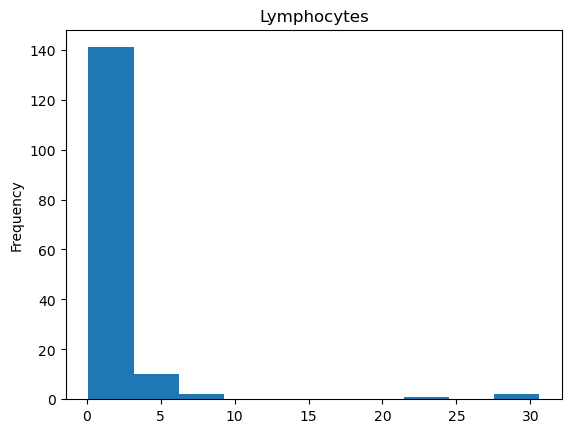

In [75]:
covid_flu['lymphocytes'].plot(title='Lymphocytes', kind='hist', xlabel='cells/μL')

<span style="color:yellow">The original data show a right-skewed distribution with a bump on the left side of the distribution and a tail on the right-hand side. Let’s import the EndOfTailImputer class now and impute values into the feature, using the default Gaussian method, which is computed by the following formula:</span>

In [78]:
!pip install feature_engine
!pip install --upgrade feature_engine


In [82]:
#skitlearn , feature-engine, pandas(python)
from feature_engine.imputation import EndOfTailImputer

ImportError: cannot import name 'EndOfTailImputer' from 'feature_engine.imputation' (/opt/conda/lib/python3.7/site-packages/feature_engine/imputation/__init__.py)

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the tail percentage to 5%
tail_imputer = EndOfTailImputer(tail='both', fold=3)

# Convert the numpy array to a Pandas Series
lymphocytes_imputed = pd.Series(tail_imputer.fit_transform(covid_flu[['lymphocytes']]).squeeze())

# Plot the imputed data
plt.hist(lymphocytes_imputed, bins=20)
plt.title('Lymphocytes (Imputed)')
plt.xlabel('cells/μL')
plt.show()
                                                                  

NameError: name 'EndOfTailImputer' is not defined

Our imputer has filled in values, and we now can see a large bar at around the value of 14. These are our imputed values. If we wanted to calculate how this happens, our arithmetic mean of the feature is 1.850154, and our standard deviation is 3.956668. So our imputer is imputing the following value:

In [ ]:
1.850154 + (3 * 3.956668) = 13.720158

# Imputing missing qualitative data

Let’s turn our focus on our qualitative data, so we can start building our feature engineering pipelines. Let’s begin by grabbing our categorical columns and putting them in a list, as shown in the following listing.

In [ ]:
categorical_types = ['O']  # The "object" type in pandas
categorical_columns = covid_flu.select_dtypes(include=categorical_types).columns.tolist()
categorical_columns.remove('Diagnosis')             
for categorical_column in categorical_columns:
    print('=======')
    print(categorical_column)
    print('=======')
    print(covid_flu[categorical_column].value_counts(dropna=False))

* <span style="color:yellow"> We want to remove our response variable from the this list because it is not a feature in our ML Model.</span>
* <span style="color:yellow">It looks like all of our categorical columns are binary except for <B>RiskFactors</B> , which looks to be a pretty dirty, comma-separated list of factors. Before we attempt to deal with RiskFactors, let’s clean up our binary features.</span>
* <span style="color:yellow">Let’s start by turning the <B>Sex</B> column into a <B> true/false</B> binary column and then mapping all instances of Yes to True and No to False in our DataFrame. This will allow these values to be machine readable, as Booleans are treated as 0s and 1s in Python.</span

1. <span style="color:yellow">Create a new column called Female, which will be True if the Sex column indicated Female and False, otherwise.</span>
2. <span style="color:yellow">Use the replace feature in pandas to replace Yes with True and No with False everywhere in our dataset.</span>

In [ ]:
covid_flu['Female'] = covid_flu['Sex'] == 'F'
del covid_flu['Sex']                         
#Turn our sex columns into a binary columns

covid_flu = covid_flu.replace({'Yes': True, 'No': False}) 
#Replce Yes and NO with True and False using mapping.

* Here, you have to decide which method should we choose to deal with categorical for specific columns

## MOST-FREQUENT CATEGORY IMPUTATION

* <span style="color:yellow">As with numerical data, there are many ways we can impute missing categorical data. One such method is called the most-frequent category imputation or mode imputation.</span> 

In [83]:
# could be most_frequent or constant (arbitrary) for categorical values
cat_impute = SimpleImputer(strategy='most_frequent')   
 
print(covid_flu['Coughing'].head())
# Transforming turn the columns iinto a Numpy Array 
print(cat_impute.fit_transform(covid_flu[['Coughing']])[:5])  

0    Yes
1    NaN
2    NaN
3    Yes
4    NaN
Name: Coughing, dtype: object
[['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']]


## ARBITRARY CATEGORY IMPUTATION

* <span style="color:yellow">Similar to arbitrary value imputation for numerical values, we can apply this to categorical values by either creating a new category, called Missing or Unknown, that the machine learning algorithm will have to learn about or by making an assumption about the missing values and filling in the values based on that assumption.</span>

* <span style="color:yellow">For our purposes, let’s make an assumption about missing categorical data and say that if a categorical value (which, in our data, represents a symptom) is missing, the doctor in charge of writing this down did not think they were presenting this symptom, so it is more likely than not that they did not have this symptom. Basically, we will replace all missing categorical values with False.</span>

In [84]:
# Reshape the input array to 2D
coughing = covid_flu['Coughing'].values.reshape(-1, 1)

# Impute missing values with False
fill_with_false = SimpleImputer(strategy='constant', fill_value=False)
coughing_imputed = fill_with_false.fit_transform(coughing)

# Replace the original column with the imputed values
covid_flu['Coughing'] = coughing_imputed
coughing_imputed

array([['Yes'],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]], dtype=object)

# Feature construction


* Just like we talked about in the last chapter, <span style="color:yellow">feature construction is the manual creation of new features by directly transforming existing features, and we are going to do just that.</span> 
* In this section, <span style="color:yellow">we are going to take a look at our features and make transformations to them based on their data level (e.g., ordinal, nominal, etc).</span>

## Numerical feature transformations

* In this section, we are going to go over some ways of <B>creating new features</B> from the ones we started with. 
* Our goal is to create new, more useful features than the ones we started with. Let’s begin by applying some mathematical transformations to our features

## LOG TRANSFORMS

* <span style="color:yellow">Log transforms are probably the most common feature transformation technique that replaces each value in a column x with the<B> value log(1 + x)</B>.</span> 
* <span style="color:yellow"><B>Why 1 + x and not just x? One reason is that we want to be able to handle 0 values, and log(0) is undefined. In fact, the log transform only works on strictly positive data</B></span>.
* <span style="color:yellow">The log transform’s overall purpose is to make the data look more normal. This is preferred in many cases, mostly because data being normal is one of the most overlooked assumptions in data science.</span> 
* <span style="color:yellow">Many underlying tests and algorithms assume that data are normally distributed, including chi-squared tests and logistic regressions.</span> 
* <span style="color:yellow">Another reason we would prefer to transform our skewed data into normally distributed data is that the transformation tends to leave behind fewer outliers, and <B>machine learning algorithms don’t tend to work well with outliers.</B></span>

<AxesSubplot:title={'center':'Lymphocytes'}, ylabel='Frequency'>

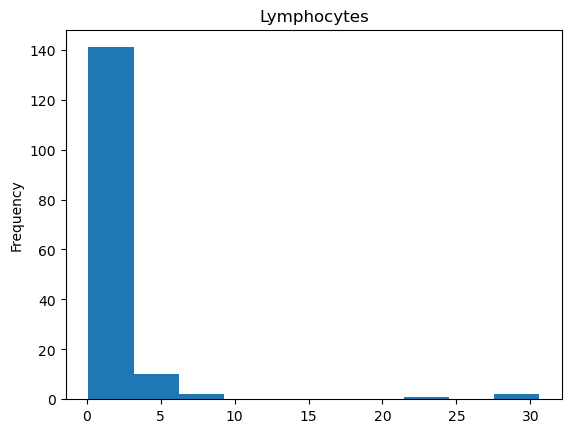

In [85]:
covid_flu['lymphocytes'].plot(title='Lymphocytes', kind='hist', xlabel='cells/μL')       

* Before log transform 👆 
* Log transform of lymphocytes 👇 (you'll see function for log inside map)

<AxesSubplot:title={'center':'Lymphocytes (Log Transformed)'}, ylabel='Frequency'>

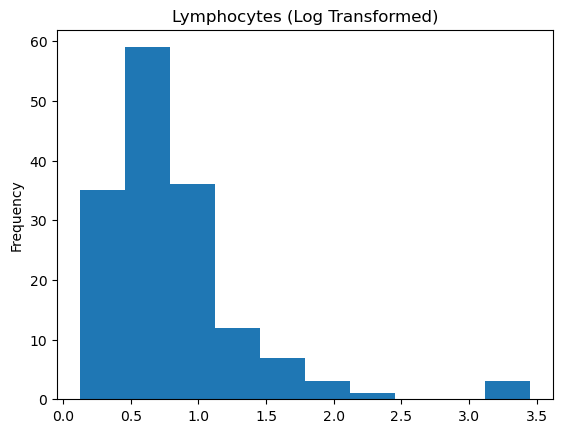

In [86]:
covid_flu['lymphocytes'].map(np.log1p).plot(title='Lymphocytes (Log Transformed)', kind='hist', xlabel='cells/μL')


* Our data look much more normal after applying the log transform on above figure. However, we do have a way of taking this transformation even further, using another kind of feature transformation.

## BOX-COX TRANSFORMS

A less common, but oftentimes more useful transformation, is the Box-Cox transformation. The Box-Cox transformation is a transformation parameterized by a parameter lambda that will shift the shape of our data to be more normal.

Lambda is a parameter here that is chosen to make the data look the most normal. It’s also worth noting that the Box-Cox transform only works on strictly positive data

In [87]:
from sklearn.impute import SimpleImputer  

from sklearn.preprocessing import PowerTransformer
 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'neutrophil'}>],
       [<AxesSubplot:title={'center':'serumLevelsOfWhiteBloodCell'}>,
        <AxesSubplot:title={'center':'lymphocytes'}>],
       [<AxesSubplot:title={'center':'DurationOfIllness'}>,
        <AxesSubplot:title={'center':'Temperature'}>]], dtype=object)

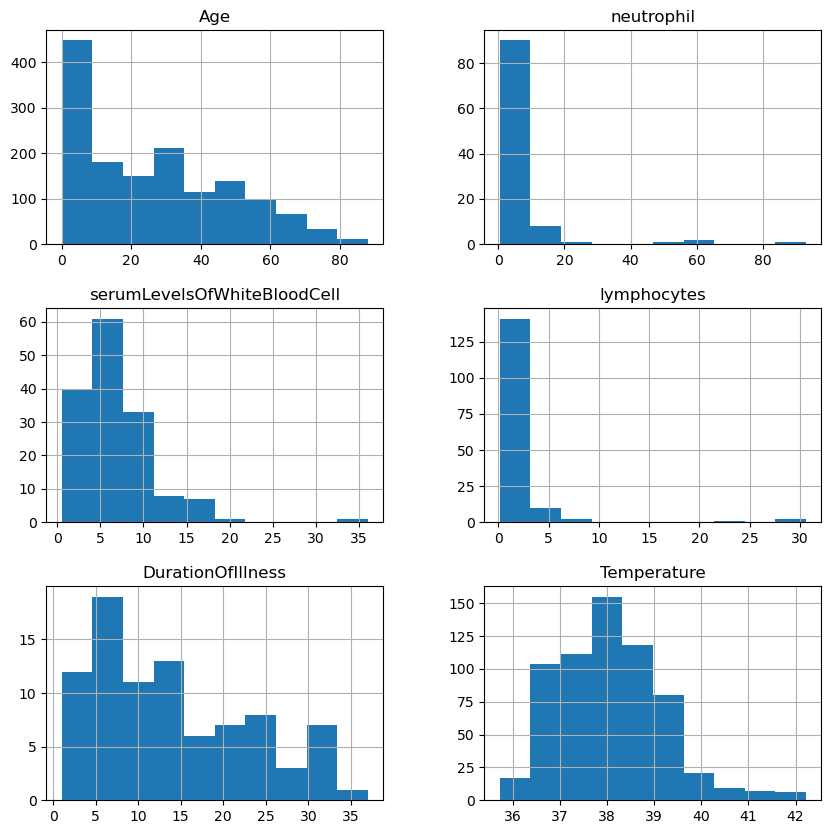

In [88]:
covid_flu[covid_flu['Age']==0].head(3)            
 
covid_flu['Age'] = covid_flu['Age'] + 0.01        
pd.DataFrame(covid_flu[numerical_columns]).hist(figsize=(10, 10))

* Histograms of quantitative features before applying the Box-Cox transformation 👆 
* Histograms of quantitative features after applying Box-Cox look much more normal than the original features. 👇 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'neutrophil'}>],
       [<AxesSubplot:title={'center':'serumLevelsOfWhiteBloodCell'}>,
        <AxesSubplot:title={'center':'lymphocytes'}>],
       [<AxesSubplot:title={'center':'DurationOfIllness'}>,
        <AxesSubplot:title={'center':'Temperature'}>]], dtype=object)

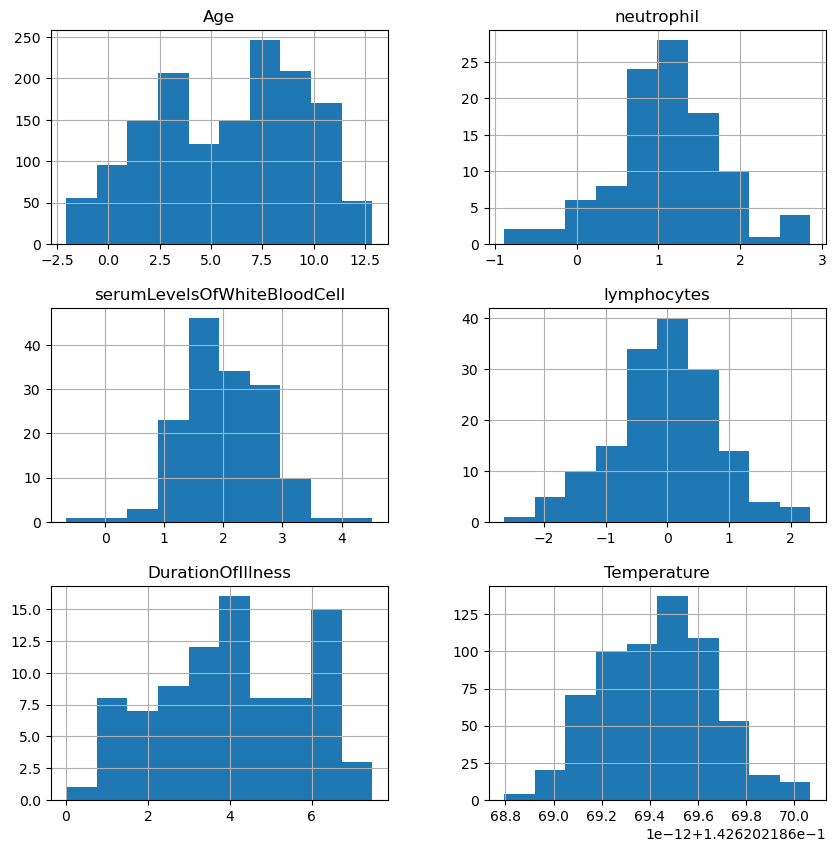

In [89]:
from sklearn.preprocessing import PowerTransformer
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

pd.DataFrame(boxcox_transformer.fit_transform(covid_flu[numerical_columns]), columns=numerical_columns).hist(figsize=(10, 10))

We can even take a look at the lambdas that were chosen to make our data more normal (figure 3.9). A lambda value of 1 would not change the shape of our distribution, so if we see a value very close to 1, our data were already close to normally distributed:

In [90]:
boxcox_transformer.lambdas_

array([ 0.41035252, -0.22261792,  0.12473207, -0.24415703,  0.36376995,
       -7.01162857])

NORMALIZING NEGATIVE DATA The PowerTransformer class also supports the Yeo-Johnson transformation, which also attempts to distort distributions to be more normal but has a modification in it that allows it to be utilized on negative data. Our data do not have any negatives in them, so we did not need to use it.

Feature transformations seem like they are a great catchall for forcing our data to be normal, but there are disadvantages to using the log and Box-Cox transformations:

* We are distorting the original variable distribution, which may lead to decreased performance.
* We are also changing various statistical measures, including the covariance between variables. This may become an issue when relying on techniques that use the covariance, like PCA.
* Transformations run the risk of hiding outliers in our data, which may sound good at first but means that we lose control over dealing with outliers manually if we rely entirely on these transformations.

## FEATURE SCALING

* <span style="color:yellow"> In most datasets with numerical features, we run into the issue that the scales of the data are vastly different from one another, and some scales are just too big to be efficient.</span> 
* <span style="color:yellow">This can be an issue for algorithms where the distance between points is important, like in k-nearest neighbors (k-NN), k-means, or algorithms that rely on a gradient descent, like neural networks and SVMs.</span>

Moving forward, we will talk about two kinds of standardization: 
* <span style="color:yellow"><B>min-max standardization and z-score standardization.</B></span> 
* <span style="color:yellow">Min-max standardization scales values in a feature to be between 0 and 1,</span> 
* <span style="color:yellow">while z-score standardization scales values to have a mean of 0 and a variance of 1, allowing for negative values.</span> 
* <span style="color:yellow">While min-max standardization ensures that each feature is on the same scale (from 0 to 1),</span> 
* <span style="color:yellow">z-score standardization ensures that outliers are handled more properly but will not guarantee that the data will end up on the exact same scale.</span>

Both transformations do not affect the distribution of the feature like the log and Box-Cox transformations, and 
* <span style="color:yellow">they both help deal with the effects of outliers on our models. Min-max standardization has a harder time dealing with outliers, so if our data have many outliers, it is generally better to stick with z-score standardization.</span>

In [91]:
covid_flu[numerical_columns].describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.481040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.010000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.010000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.010000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.010000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.010000,93.000000,36.070000,30.600000,37.000000,42.222222


* Before any transformations, scales are all over the place, as are means and standard deviations. 👆 
* Let’s start by applying the StandardScalar class from scikit-learn to standardize our data 👇 after standardization:

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    StandardScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1.454000e+03,103.000000,1.510000e+02,1.560000e+02,8.700000e+01,6.280000e+02
mean,1.368308e-16,0.000000,-1.411674e-16,-1.708035e-17,-5.614921e-17,1.708471e-15
std,1.000344e+00,1.004890,1.003328e+00,1.003221e+00,1.005797e+00,1.000797e+00
min,-1.232324e+00,-0.507435,-1.473866e+00,-4.361482e-01,-1.444604e+00,-2.145299e+00
25%,-9.064480e-01,-0.371709,-6.671264e-01,-3.074706e-01,-7.772737e-01,-7.736770e-01
50%,-1.150359e-01,-0.280644,-2.758748e-01,-2.395187e-01,-2.211651e-01,-6.246559e-02
75%,7.229298e-01,-0.016556,5.239403e-01,-6.215921e-02,6.686088e-01,5.979450e-01
max,2.864398e+00,6.821614,6.736646e+00,7.289577e+00,2.559378e+00,3.798396e+00


* <span style="color:yellow">We can see that all features now have a mean of 0 and a standard deviation (and therefore variance) of 1, but the ranges are different if we look at the min and max of the features</span>

Let’s see this now for min-max standardization:

In [93]:
pd.DataFrame(  # mean and std are different but min and max are 0s and 1s
    MinMaxScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,0.300807,0.069236,0.179510,0.056454,0.360792,0.360937
std,0.244182,0.137111,0.122200,0.129855,0.251199,0.168380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.079545,0.018519,0.098257,0.016656,0.166667,0.230769
50%,0.272727,0.030944,0.145909,0.025451,0.305556,0.350427
75%,0.477273,0.066977,0.243323,0.048408,0.527778,0.461538
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<span style="color:yellow">Now, our scales are spot on with all features having a min of 0 and a max of 1, but our standard deviations and means are no longer identical.</span>

## Constructing categorical data

Constructing quantitative features generally involves transforming original features, using methods like Box-Cox and log transforms. When constructing qualitative data, however, we only have a few options to extract as much signal as possible from our features. Of those methods, binning transforms quantitative data into qualitative data.

### BINNING

* <span style="color:yellow">Binning refers to the act of creating a new categorical (usually ordinal) feature from a numerical or categorical feature. The most common way to bin data is to group numerical data into bins based on threshold cutoffs, similar to how a histogram is created.</span>

* <span style="color:yellow">The main goal of binning is to decrease our model’s chance of overfitting the data. Usually, this will come at the cost of performance, as we are losing granularity in the feature that we are binning.</span>

<AxesSubplot:title={'center':'Age (Uniform Binning)'}, ylabel='Frequency'>

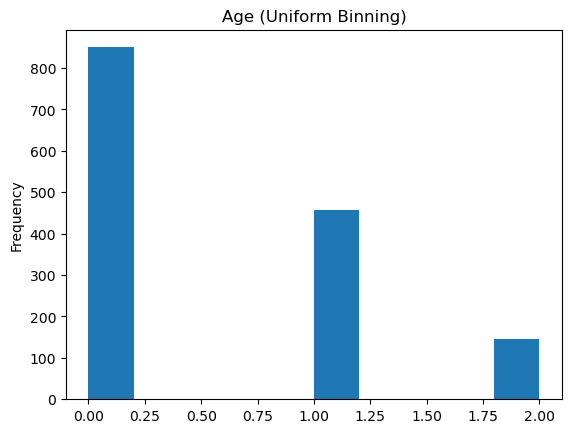

In [94]:
from sklearn.preprocessing import KBinsDiscretizer              
 
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (Uniform Binning)', kind='hist', xlabel='Age'    
) # before binining 👆 

<AxesSubplot:>

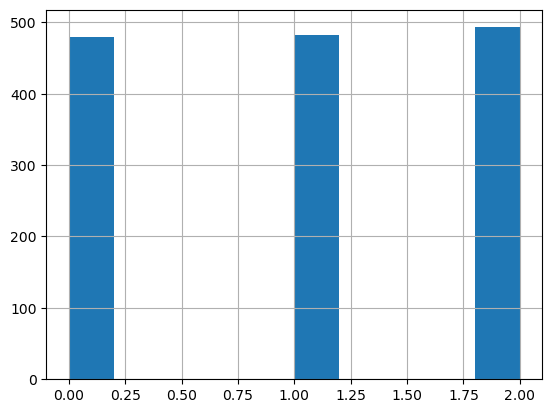

In [95]:
# after bining 👇 
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).hist() 

## ONE-HOT ENCODINGS

* The RiskFactors feature is a bit of a mess and will require us to get our hands dirty and create a custom feature transformer that will work in our machine learning pipeline. 
* <span style="color:yellow">Our goal is to transform a feature on the nominal level and create a one-hot encoding matrix, where each feature represents a distinct category, and the value is either 1 or 0, representing the presence of that value in the original observation</span>

* <span style="color:yellow">We will need to create a custom scikit-learn transformer that will split the RiskFactors columns’ values by comma and then dummify them into a matrix, where each column represents a risk factor, and the value is either 0 (for the patient either not presenting the symptom or the value being null) or 1 (where the patient is presenting that risk factor).</span> 

In [96]:
# Import necessary libraries
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import MultiLabelBinarizer

# Define a custom transformer class that inherits from BaseEstimator and TransformerMixin
class DummifyRiskFactor(BaseEstimator, TransformerMixin):
    # Initialize a variable label_binarizer to None
    def __init__(self):
        self.label_binarizer = None
        
    # Define a method called parse_risk_factors that takes a comma-separated string of risk factors
    # and returns a list of individual risk factors
    def parse_risk_factors(self, comma_sep_factors):
        ''' asthma,heart disease -> ['asthma', 'heart disease'] '''
        try:
            return [s.strip().lower() for s in comma_sep_factors.split(',')]
        except:
            return []


In [97]:
    # Define a method called fit that takes a dataframe X and an optional target variable y
    # Fit a MultiLabelBinarizer to the parsed risk factors in X
    # Store the MultiLabelBinarizer in the label_binarizer variable and return self
    def fit(self, X, y=None):
        self.label_binarizer = MultiLabelBinarizer()
        self.label_binarizer.fit(X.apply(self.parse_risk_factors))
        return self


In [98]:
    # Define a method called transform that takes a dataframe X and an optional target variable y
    # Transform X by applying the parsed risk factors to the label_binarizer variable
    def transform(self, X, y=None):
        return self.label_binarizer.transform(X.apply(self.parse_risk_factors))


In [99]:
# Create an instance of DummifyRiskFactor transformer
drf = DummifyRiskFactor()

# Fit and transform the risk factors column of the covid_data dataframe
risks = drf.fit_transform(covid_flu['RiskFactors'])

# Print the shape of the transformed matrix
print(risks.shape)

# Create a pandas DataFrame from the transformed matrix using the class names from the fitted MultiLabelBinarizer
pd.DataFrame(risks, columns=drf.label_binarizer.classes_)


AttributeError: 'DummifyRiskFactor' object has no attribute 'fit'

## Building our feature engineering pipeline

Now that we’ve seen a few examples of feature engineering, let’s put them to the test. Let’s set up our dataset for machine learning by splitting our data into training and testing sets.

## Train/test splits

To effectively train an ML pipeline that can generalize well to unseen data is to follow the train/test split paradigm 

* <span style="color:yellow">Split our entire dataset into a training set (80% of the data) and a testing set (20% of the data).</span>
* <span style="color:yellow">Use the training dataset to train our ML pipeline and perform a cross-validated grid search to choose from a small set of potential parameter values.</span>
* <span style="color:yellow">Take the best set of parameters and use that to train the ML pipeline on the entire training set.</span>
* <span style="color:yellow">Output a classification report using scikit-learn by testing our ML pipeline on the testing set, which, as of now, we haven’t touched</span>

In [100]:
from sklearn.model_selection import train_test_split
X, y = covid_flu.drop(['Diagnosis'], axis=1), covid_flu['Diagnosis']
x_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=.2
)

In [105]:
!pip install --upgrade scikit-learn

In [108]:
class DummifyRiskFactor:
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # your code here
        return X_transformed


In [112]:
from sklearn.preprocessing import FunctionTransformer, SimpleImputer

ImportError: cannot import name 'SimpleImputer' from 'sklearn.preprocessing' (/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [109]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define pipeline to parse and dummify risk factor variable
risk_factor_pipeline = Pipeline([
    ('select_and_parse_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
    ('dummify', DummifyRiskFactor())
])

# deal with binary columns
binary_pipeline = Pipeline([
    ('select_categorical_features', FunctionTransformer(lambda df: df[binary_features])),
    ('fillna', SimpleImputer(strategy='constant', fill_value=False))
])

# deal with numerical columns
numerical_pipeline = Pipeline([
    ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
    ('impute', SimpleImputer(strategy='median')),
])
